# **Business Case: Yulu - Hypothesis Testing**

# **About Yulu**

Yulu, India's pioneering micro-mobility service provider, has embarked on a mission to
revolutionize daily commutes by offering unique, sustainable transportation solutions.
However, recent revenue setbacks have prompted Yulu to seek the expertise of a consulting
company to delve into the factors influencing the demand for their shared electric cycles,
specifically in the Indian market.

**Business Problem**

Strategic Expansion: Yulu's decision to enter the Indian market is a strategic move to
expand its global footprint. Understanding the demand factors in this new market is
essential to tailor their services and strategies accordingly.

Revenue Recovery: Yulu's recent revenue decline is a pressing concern. By analyzing the
factors affecting demand for shared electric cycles in the Indian market, they can make
informed adjustments to regain profitability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")


In [3]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
#checking shape
df.shape

(10886, 12)

In [6]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
#checking null values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
#checking for duplicates
np.any(df.duplicated())

False

In [10]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [11]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [12]:
df['day'] = df['datetime'].dt.day_name()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  day         10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.1+ MB


In [14]:
#updating season column
# 1: spring, 2: summer, 3: fall, 4: winter
def season_category(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'
df['season'] = df['season'].apply(season_category)

In [15]:
#updating datatypes of columns

df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')
df['temp'] = df['temp'].astype('float32')
df['atemp'] = df['atemp'].astype('float32')
df['humidity'] = df['humidity'].astype('int8')
df['windspeed'] = df['windspeed'].astype('float32')
df['casual'] = df['casual'].astype('int16')
df['registered'] = df['registered'].astype('int16')
df['count'] = df['count'].astype('int16')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float32       
 6   atemp       10886 non-null  float32       
 7   humidity    10886 non-null  int8          
 8   windspeed   10886 non-null  float32       
 9   casual      10886 non-null  int16         
 10  registered  10886 non-null  int16         
 11  count       10886 non-null  int16         
 12  day         10886 non-null  object        
dtypes: category(4), datetime64[ns](1), float32(3), int16(3), int8(1), object(1)
memory usage: 415.4+ KB


In [17]:
df.set_index('datetime', inplace = True)

In [18]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.230862,23.655085,61.886460,12.799396,36.021955,155.552177,191.574132
std,7.791590,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.940000,16.665001,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.240000,31.059999,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.000000,45.455002,100.000000,56.996899,367.000000,886.000000,977.000000


In [19]:
np.round(df['season'].value_counts(normalize = True) * 100, 2)

season
winter    25.11
fall      25.11
summer    25.11
spring    24.67
Name: proportion, dtype: float64

In [20]:
np.round(df['holiday'].value_counts(normalize = True) * 100, 2)

holiday
0    97.14
1     2.86
Name: proportion, dtype: float64

In [21]:
np.round(df['workingday'].value_counts(normalize = True) * 100, 2)

workingday
1    68.09
0    31.91
Name: proportion, dtype: float64

In [22]:
np.round(df['weather'].value_counts(normalize = True) * 100, 2)

weather
1    66.07
2    26.03
3     7.89
4     0.01
Name: proportion, dtype: float64

[]

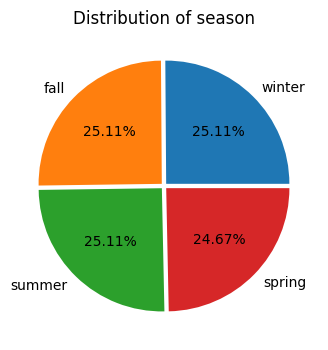

In [23]:
#checking the distribution of season

plt.figure(figsize = (4, 4))
plt.title('Distribution of season')
df_season = np.round(df['season'].value_counts(normalize = True) * 100, 2).to_frame()
plt.pie(x = df_season['proportion'],
        explode = [0.025, 0.025, 0.025, 0.025],
        labels = df_season.index,
        autopct = '%.2f%%')
plt.plot()

[]

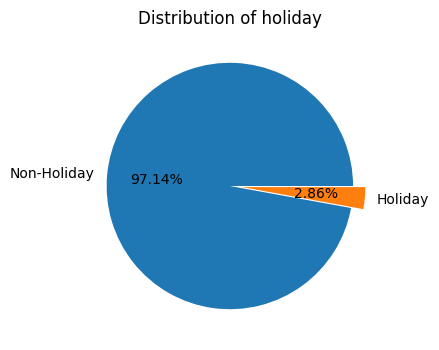

In [24]:
#checking the distribution of holiday

plt.figure(figsize = (4, 4))
plt.title('Distribution of holiday')
df_holiday = np.round(df['holiday'].value_counts(normalize = True) * 100, 2).to_frame()
plt.pie(x = df_holiday['proportion'],
        explode = [0, 0.1],
        labels = ['Non-Holiday', 'Holiday'],
        autopct = '%.2f%%')

plt.plot()

[]

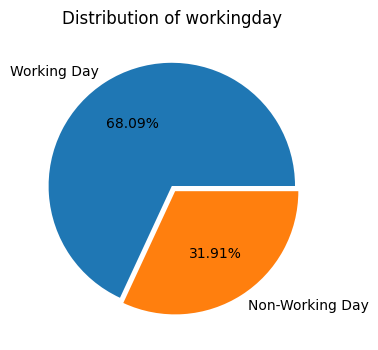

In [25]:
#checking the distribution of workingday

plt.figure(figsize = (4, 4))
plt.title('Distribution of workingday')
df_workingday  = np.round(df['workingday'].value_counts(normalize = True) * 100, 2).to_frame()
plt.pie(x = df_workingday['proportion'],
        explode = [0, 0.05],
        labels = ['Working Day', 'Non-Working Day'],
        autopct = '%.2f%%')

plt.plot()

[]

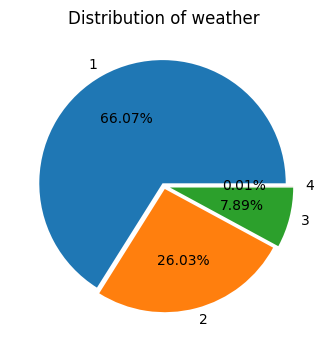

In [26]:
#checking the distribution of weather

plt.figure(figsize = (4, 4))
plt.title('Distribution of weather')
df_weather = np.round(df['weather'].value_counts(normalize = True) * 100, 2).to_frame()
plt.pie(x = df_weather['proportion'],
        explode = [0.025, 0.025, 0.05, 0.05],
        labels = df_weather.index,
        autopct = '%.2f%%')
plt.plot()

**Univariate Analysis**

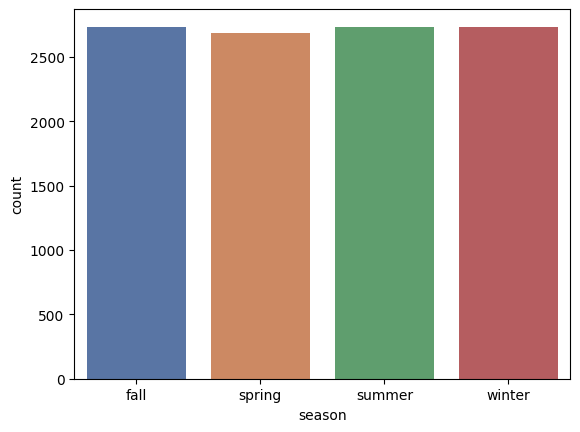

In [27]:
# distribution of season in the dataset
sns.countplot(data = df, x = 'season',palette='deep')
plt.show()

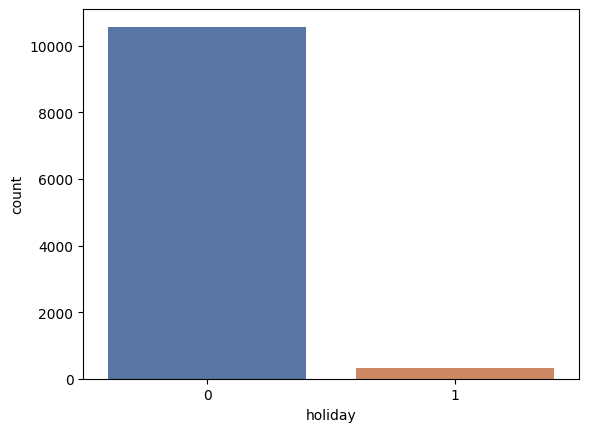

In [28]:
# distribution of holiday in the dataset
sns.countplot(data = df, x = 'holiday',palette='deep')
plt.show()

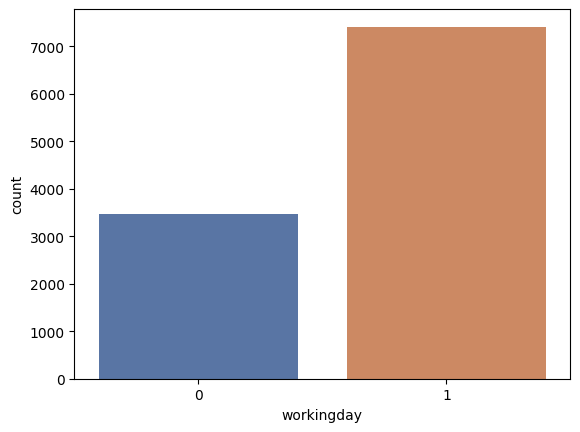

In [29]:
# distribution of workingday in the dataset
sns.countplot(data = df, x = 'workingday',palette='deep')
plt.show()

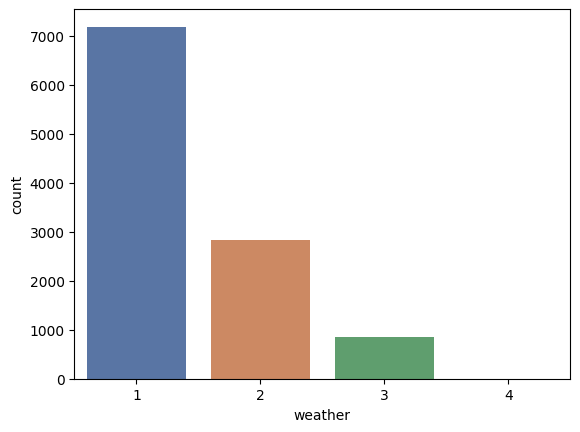

In [30]:
# distribution of weather in the dataset
sns.countplot(data = df, x = 'weather',palette='deep')
plt.show()

[]

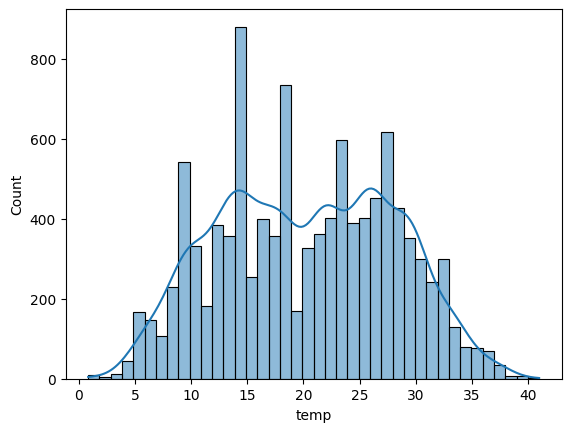

In [31]:
#distribution of temperature
sns.histplot(data = df, x = 'temp', kde = True, bins = 40)
plt.plot()

In [32]:
temp_mean = np.round(df['temp'].mean(), 2)
temp_std = np.round(df['temp'].std(), 2)
temp_mean, temp_std

(20.23, 7.79)

- The mean and the standard deviation of the temp column is 20.23 and 7.79 degree celcius respectively.

[]

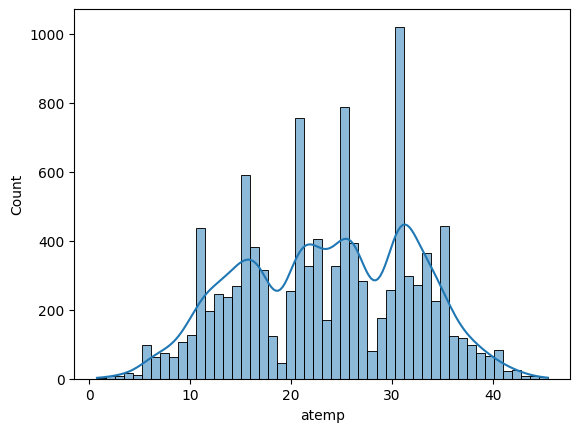

In [33]:
#distribution of atemp
sns.histplot(data = df, x = 'atemp', kde = True, bins = 50)
plt.plot()

In [34]:
temp_mean = np.round(df['atemp'].mean(), 2)
temp_std = np.round(df['atemp'].std(), 2)
temp_mean, temp_std

(23.66, 8.47)

- The mean and the standard deviation of the atemp column is 23.66 and 8.47 degree celcius respectively.

[]

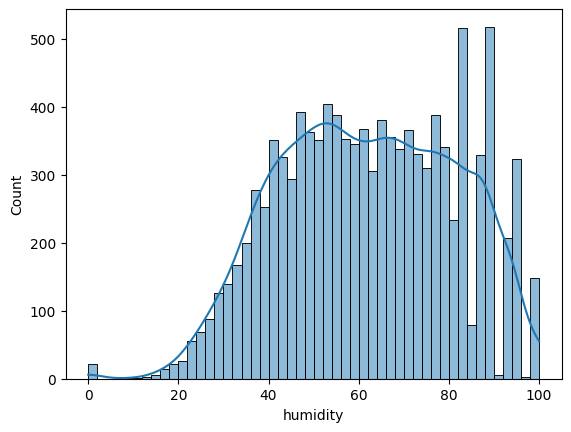

In [35]:
#distribution of humidity
sns.histplot(data = df, x = 'humidity', kde = True, bins = 50)
plt.plot()

In [36]:
humidity_mean = np.round(df['humidity'].mean(), 2)
humidity_std = np.round(df['humidity'].std(), 2)
humidity_mean, humidity_std

(61.89, 19.25)

The mean and the standard deviation of the humidity column is 61.89 and 19.25 respectively.

[]

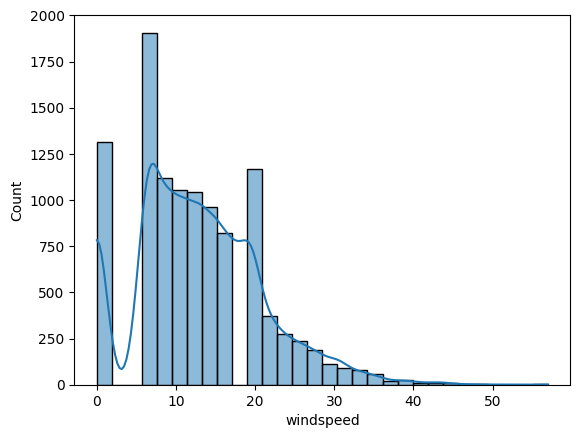

In [37]:
#distribution of windspeed
sns.histplot(data = df, x = 'windspeed', kde = True,bins=30)
plt.plot()

[]

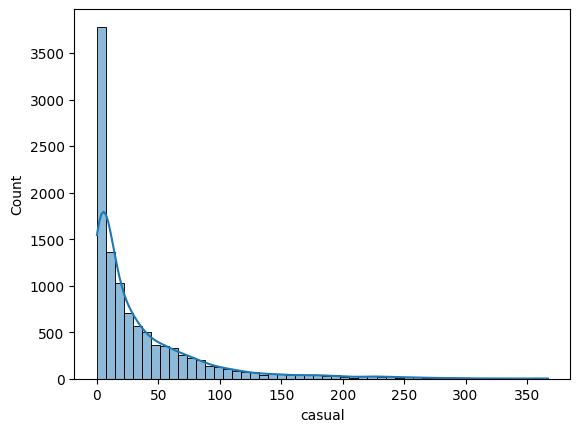

In [38]:
#distribution of casual
sns.histplot(data = df, x = 'casual', kde = True, bins = 50)
plt.plot()

[]

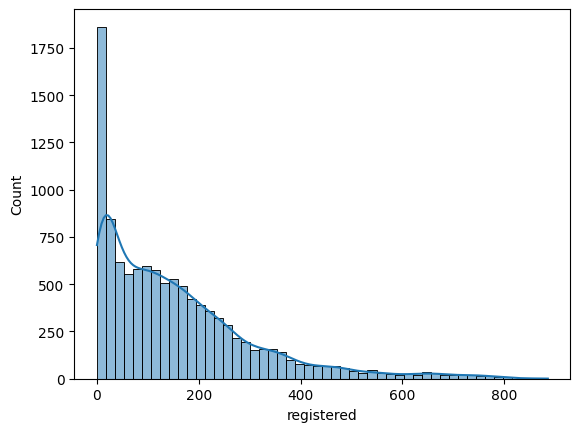

In [39]:
#distribution of registered
sns.histplot(data = df, x = 'registered', kde = True, bins = 50)
plt.plot()

**Outliers Detection**

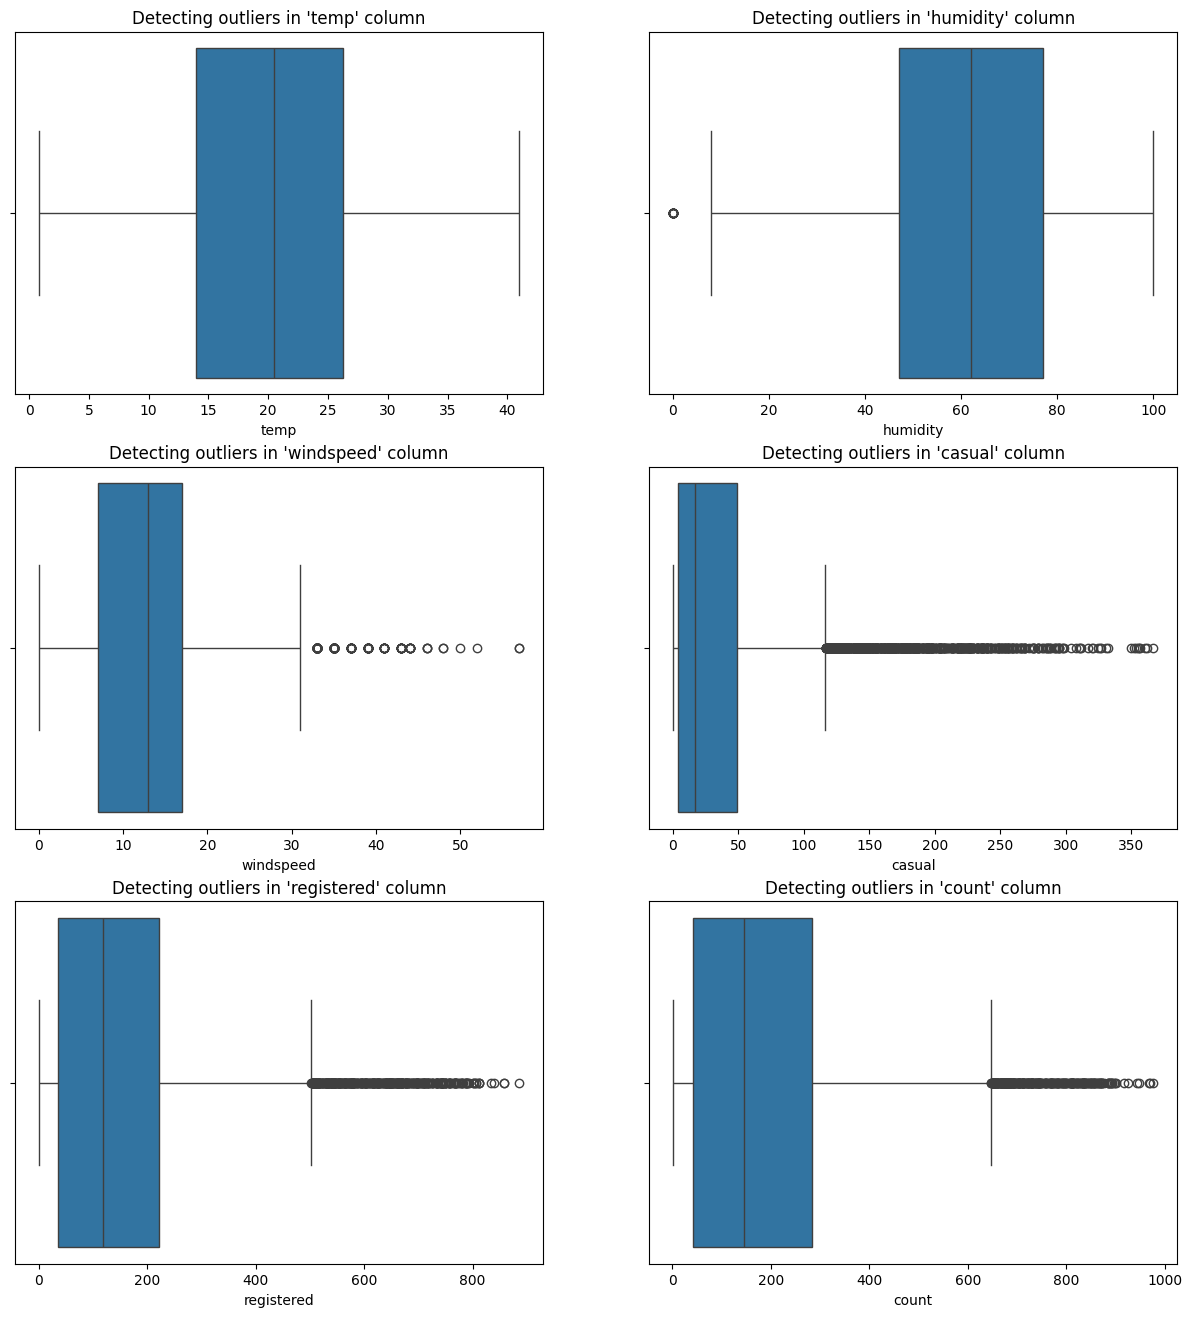

In [40]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

count = 1
plt.figure(figsize = (15, 16))
for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = df, x = df[i]   )
    plt.plot()
    count += 1

- There is no outlier in the temp column.
- There are few outliers present in humidity column.
- There are many outliers present in the columns windspeed, casual, registered, count.

**Bivariate Analysis**

[]

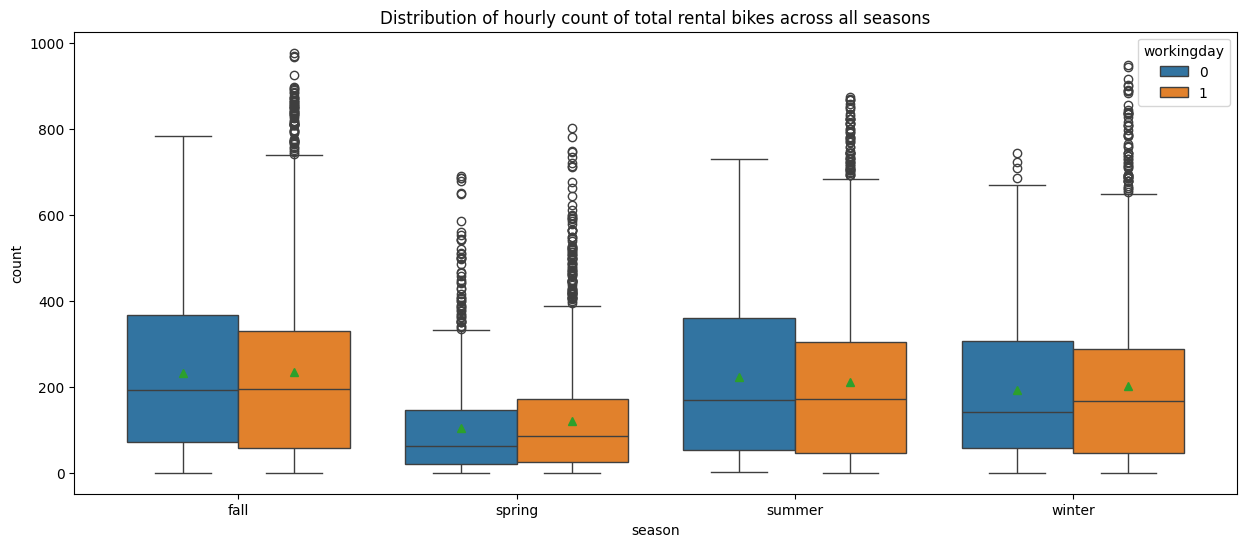

In [41]:
# Distribution of hourly count of total rental bikes across all seasons
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons',)
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.plot()

The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

[]

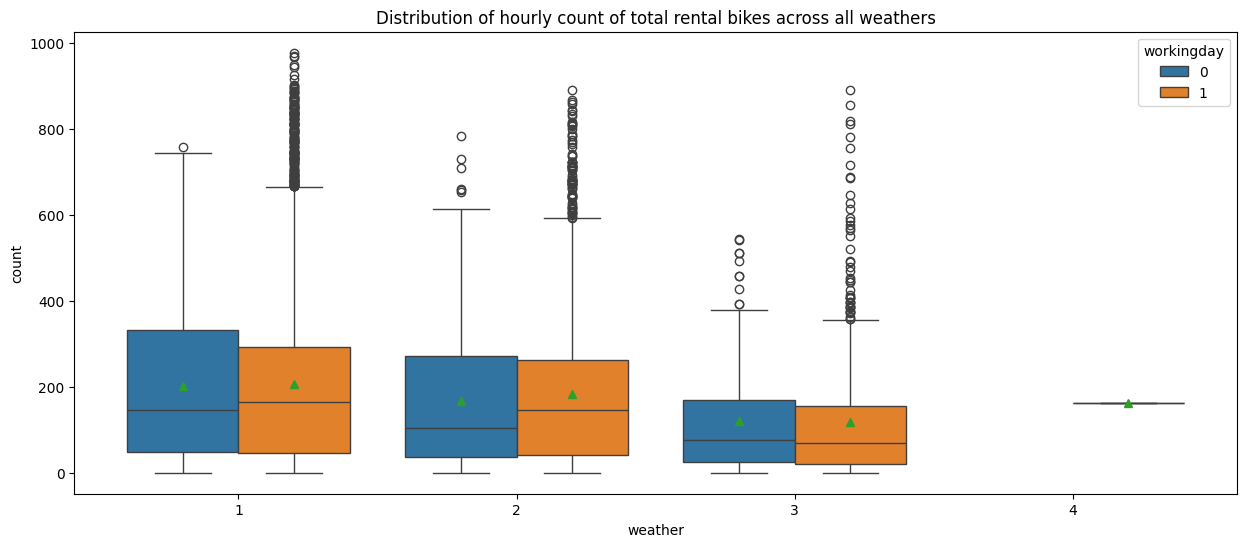

In [42]:
#Distribution of hourly count of total rental bikes across all weathers
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all weathers')
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday', showmeans = True)
plt.plot()

The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

**Is there any effect of Working Day on the number of electric cycles rented ?**

In [43]:
#Is there any effect of Working Day on the number of electric cycles rented ?

df.groupby(by = 'workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


[]

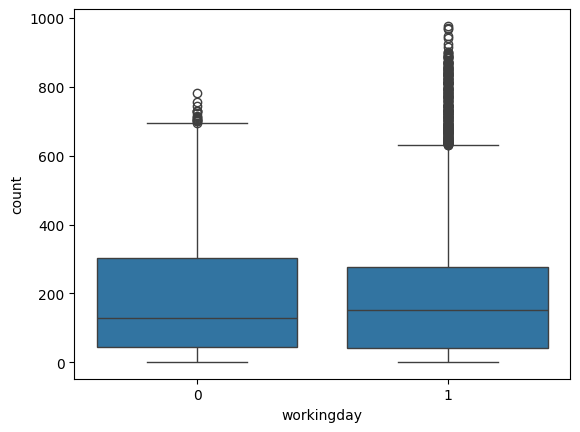

In [44]:
sns.boxplot(data = df, x = 'workingday', y = 'count')
plt.plot()

STEP-1 : Set up Null Hypothesis

Null Hypothesis ( H0 ) - Working Day does not have any effect on the number of electric cycles rented.

Alternate Hypothesis ( Ha ) - Working Day has some effect on the number of electric cycles rented

STEP-2 : Checking for basic assumpitons for the hypothesis

Distribution check using QQ Plot
Homogeneity of Variances using Levene's test

STEP-3: Define Test statistics; Distribution of T under H0.

If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample

STEP-4: Compute the p-value and fix value of alpha.

We set our alpha to be 0.05

STEP-5: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.
- p-val > alpha : Accept H0
- p-val < alpha : Fail to reject H0

[]

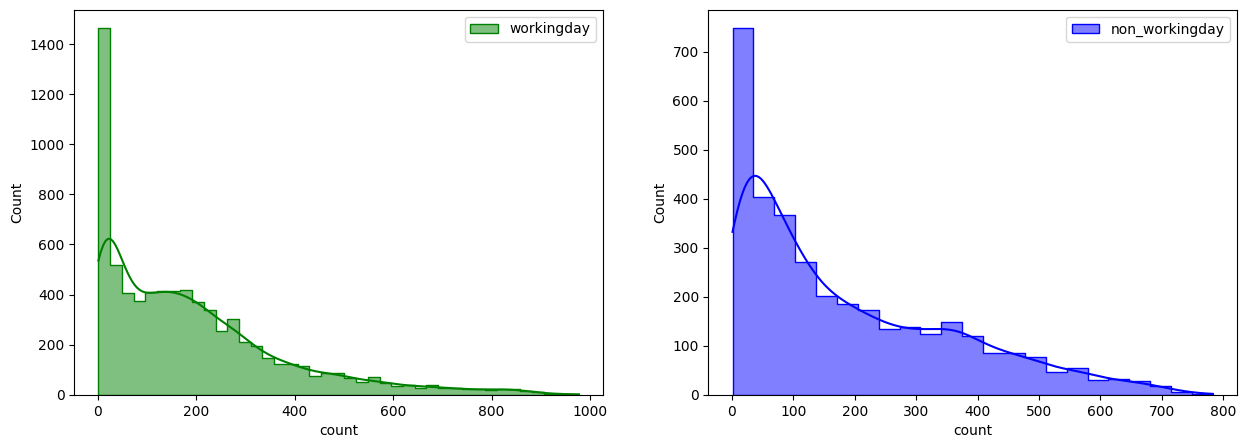

In [45]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['workingday'] == 1, 'count'],element = 'step', color = 'green', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['workingday'] == 0, 'count'],element = 'step', color = 'blue', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

From the above plot we can conclude that the distributions do not follow normal distribution.

[]

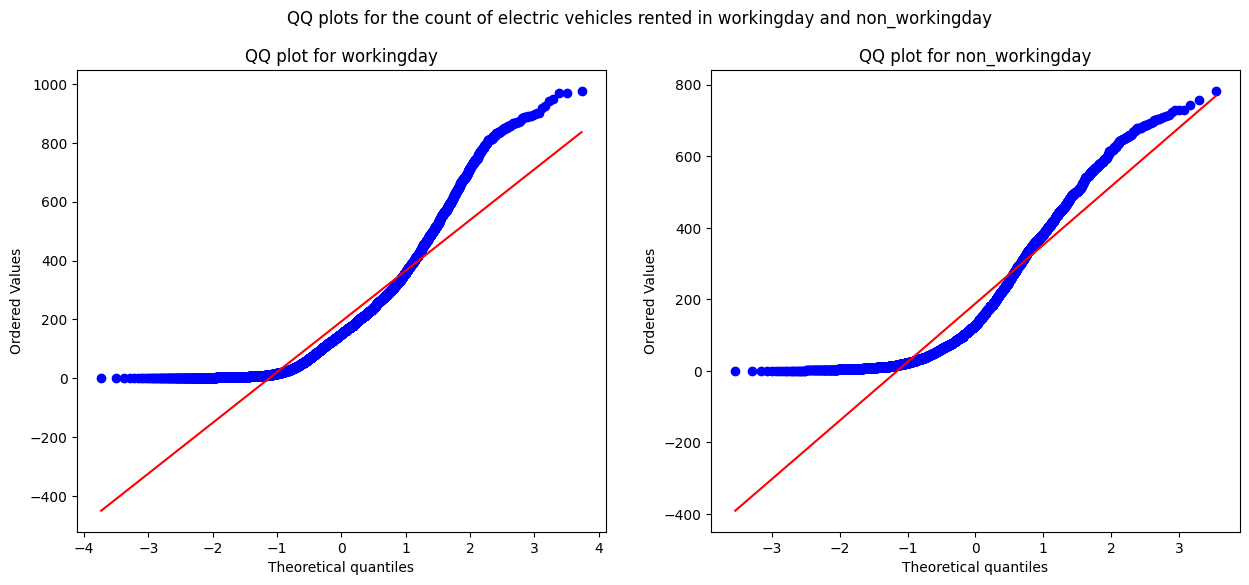

In [46]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in workingday and non_workingday')
spy.probplot(df.loc[df['workingday'] == 1, 'count'], plot = plt, dist = 'norm')
plt.title('QQ plot for workingday')
plt.subplot(1, 2, 2)
spy.probplot(df.loc[df['workingday'] == 0, 'count'], plot = plt, dist = 'norm')
plt.title('QQ plot for non_workingday')
plt.plot()


From the above plot we can conclude that the distributions do not follow normal distribution.

Applying Shapiro-Wilk test

H0  : The sample follows normal distribution

H1  : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [47]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 1, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.4782261066402423e-38
The sample does not follow normal distribution


In [48]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 6.13997275790685e-36
The sample does not follow normal distribution


In [49]:
workingday_sample=df[df['workingday']==1]['count'].sample(2000)
nonworkingday_sample=df[df['workingday']==0]['count'].sample(2000)

In [83]:
#Applying T test on the distribution

t_stat,p_value= spy.ttest_ind(np.log(workingday_sample),np.log(nonworkingday_sample),equal_var=True)
print("t stat :",t_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Working day does have an effect on number of cycles rented ")
else:
 print("Fail to Reject Ho: Working day does not have an effect on number of cycles rented")



t stat : -1.3492868852513842
p value : 0.17732124090176637
Fail to Reject Ho: Working day does not have an effect on number of cycles rented


Conclusion:

Since the p-value of our test is greater than alpha which is 0.05, we fail to reject the null hypothesis of this test.

we do not have sufficient evidence to conclude that working days have a significant effect on the number of cycles rented. This suggests that there is no significant difference in the number of cycles rented on working days versus non-working days.

**Is the demand of bicycles on rent is the same for different Weather
conditions?**

In [51]:
df.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


[]

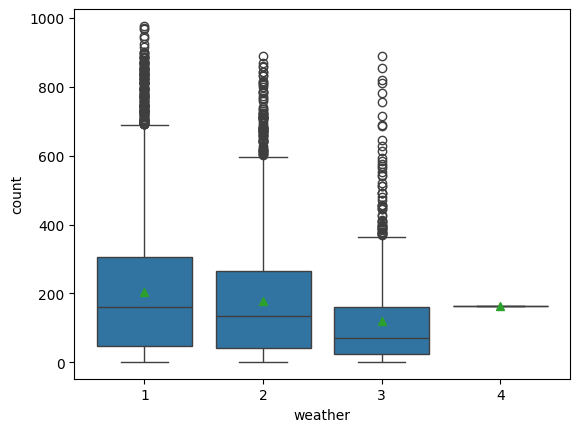

In [52]:
sns.boxplot(data = df, x = 'weather', y = 'count', showmeans = True)
plt.plot()

In [53]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

we can ignore weather4 as it has only one value

STEP-1 : Set up Null Hypothesis

Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for weather 1, 2 and 3. (We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group)

Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.

STEP-2 : Checking for basic assumpitons for the hypothesis

Normality check using QQ Plot. If the distribution is not normal, use BOX-COX transform to transform it to normal distribution.

Homogeneity of Variances using Levene's test

Each observations are independent.

STEP-3: Define Test statistics

The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

STEP-4: Decide the kind of test.

We will be performing right tailed f-test

STEP-5: Compute the p-value and fix value of alpha.

we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

STEP-6: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0

p-val < alpha : Reject H0

In [54]:
#Visual Tests to know if the samples follow normal distribution

[]

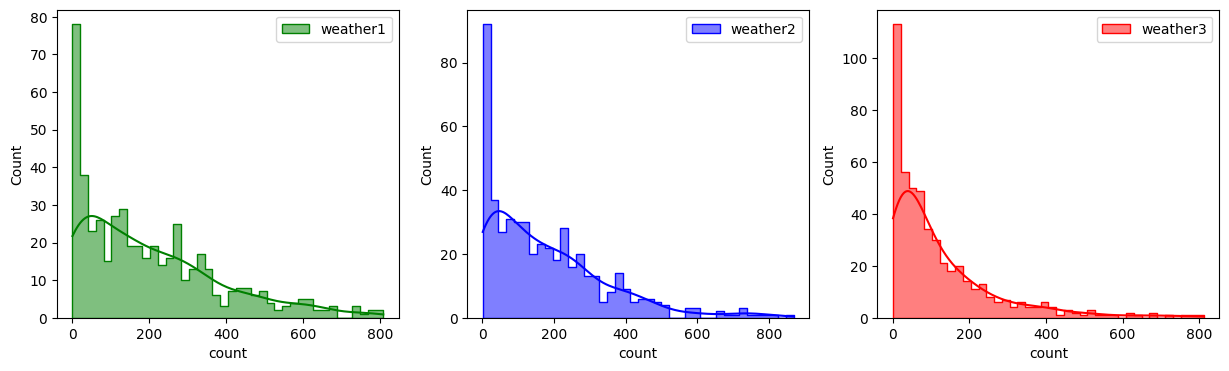

In [55]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_weather1.loc[:, 'count'].sample(500), bins = 40, element = 'step', color = 'green', kde = True, label = 'weather1')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(df_weather2.loc[:, 'count'].sample(500), bins = 40, element = 'step', color = 'blue', kde = True, label = 'weather2')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(df_weather3.loc[:, 'count'].sample(500), bins = 40, element = 'step', color = 'red', kde = True, label = 'weather3')
plt.legend()
plt.plot()

From the above plot we can say that the distributions do not follow normal distribution.


[]

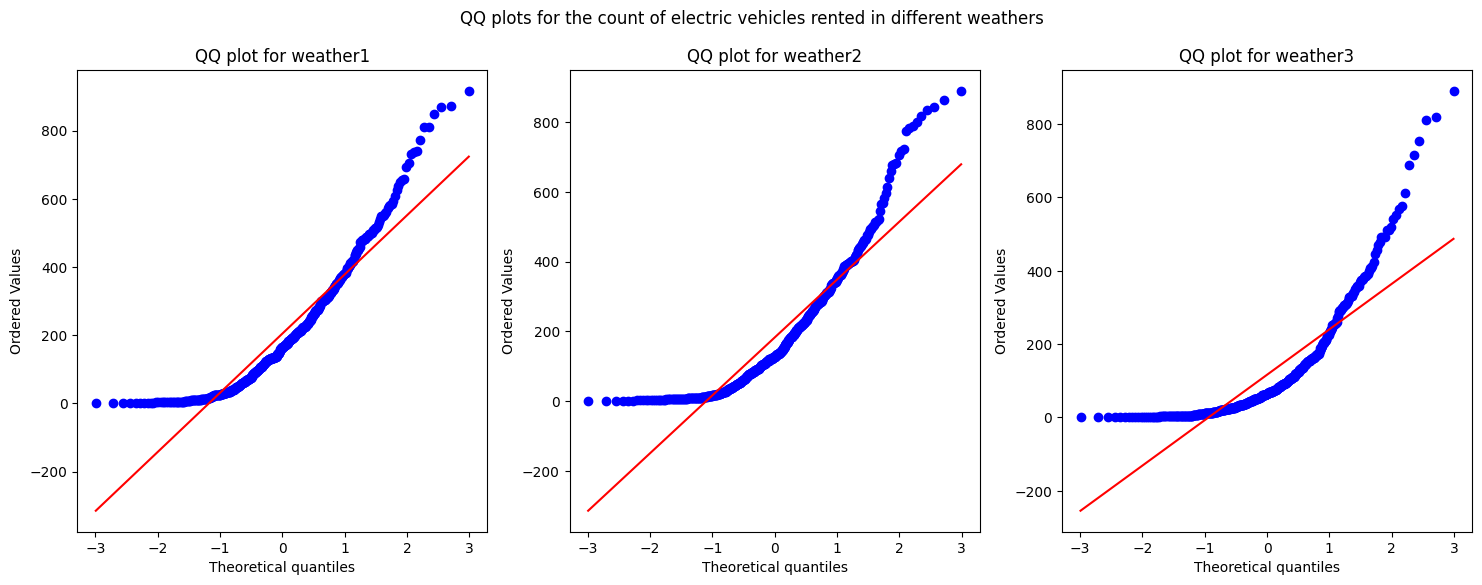

In [56]:
#Distribution check using QQ Plot

plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')
spy.probplot(df_weather1.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather1')
plt.subplot(1, 3, 2)
spy.probplot(df_weather2.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather2')
plt.subplot(1, 3, 3)
spy.probplot(df_weather3.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather3')
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.
It can be seen from the above plots that the samples do not come from normal distribution.


Applying Shapiro-Wilk test for normality

H0  : The sample follows normal distribution

H1  : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [57]:
#Applying Shapiro-Wilk test for normality

test_stat, p_value = spy.shapiro(df_weather1.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.116522692187199e-18
The sample does not follow normal distribution


In [58]:
test_stat, p_value = spy.shapiro(df_weather2.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.518427843310649e-18
The sample does not follow normal distribution


In [59]:
test_stat, p_value = spy.shapiro(df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.0522275613892514e-25
The sample does not follow normal distribution


In [60]:
#Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.

transformed_weather1 = spy.boxcox(df_weather1.loc[:, 'count'].sample(5000))[0]
test_stat, p_value = spy.shapiro(transformed_weather1)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.9484230728007288e-27
The sample does not follow normal distribution


In [61]:
transformed_weather2 = spy.boxcox(df_weather2.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather2)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.9219748327822736e-19
The sample does not follow normal distribution


In [62]:
transformed_weather3 = spy.boxcox(df_weather3.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather3)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.4137293646854232e-06
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the weather data, the samples do not follow normal distribution.

In [63]:
#Homogeneity of Variances using Levene's test

# Null Hypothesis(H0) - Homogenous Variance
# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df_weather1.loc[:, 'count'].sample(500),
                                df_weather2.loc[:, 'count'].sample(500),
                                df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 8.515197292051362e-10
The samples do not have  Homogenous Variance


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [64]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = spy.kruskal(df_weather1.loc[:, 'count'], df_weather2.loc[:, 'count'], df_weather3.loc[:, 'count'])
print('Test Statistic =', test_stat)
print('p value =', p_value)

if p_value< alpha:
 print("Reject Ho: There is at least one weather condition with a mean number of cycles rented that significantly differs from the others ")
else:
 print("Fail to Reject Ho: The mean number of cycles rented is equal across different weather conditions")

Test Statistic = 204.95566833068537
p value = 3.122066178659941e-45
Reject Ho: There is at least one weather condition with a mean number of cycles rented that significantly differs from the others 


Since the p-value obtained from our test is less than the predetermined alpha level of 0.05, we have sufficient evidence to reject the null hypothesis for this test.

Indeed, this indicates that we have collected sufficient evidence to conclude that there is a significant difference in the mean number of cycles rented across all weather conditions.

Additionally, this suggests that weather conditions do have a notable effect on the number of cycles rented.

**Is the number of cycles rented is similar or different in different season ?**

In [65]:
df.groupby(by = 'season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [66]:
df_season_spring = df.loc[df['season'] == 'spring', 'count']
df_season_summer = df.loc[df['season'] == 'summer', 'count']
df_season_fall = df.loc[df['season'] == 'fall', 'count']
df_season_winter = df.loc[df['season'] == 'winter', 'count']
len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(2686, 2733, 2733, 2734)

[]

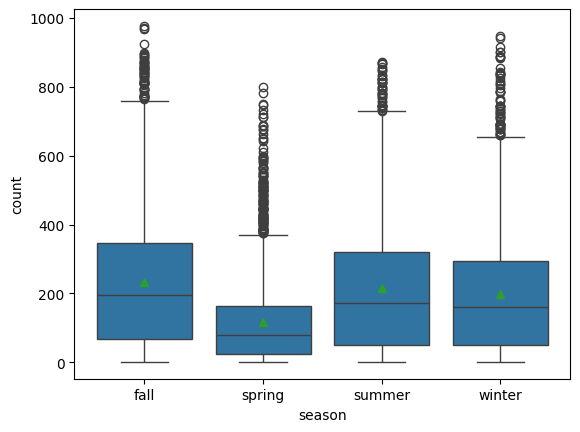

In [67]:
sns.boxplot(data = df, x = 'season', y = 'count', showmeans = True)
plt.plot()

STEP-1 : Set up Null Hypothesis

Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for season 1,2,3 and 4.

Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is different for season 1,2,3 and 4.

STEP-2 : Checking for basic assumpitons for the hypothesis

Normality check using QQ Plot. If the distribution is not normal, use BOX-COX transform to transform it to normal distribution.

Homogeneity of Variances using Levene's test

Each observations are independent.

STEP-3: Define Test statistics

The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

STEP-4: Decide the kind of test.

We will be performing right tailed f-test

STEP-5: Compute the p-value and fix value of alpha.

we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

STEP-6: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0

p-val < alpha : Reject H0

[]

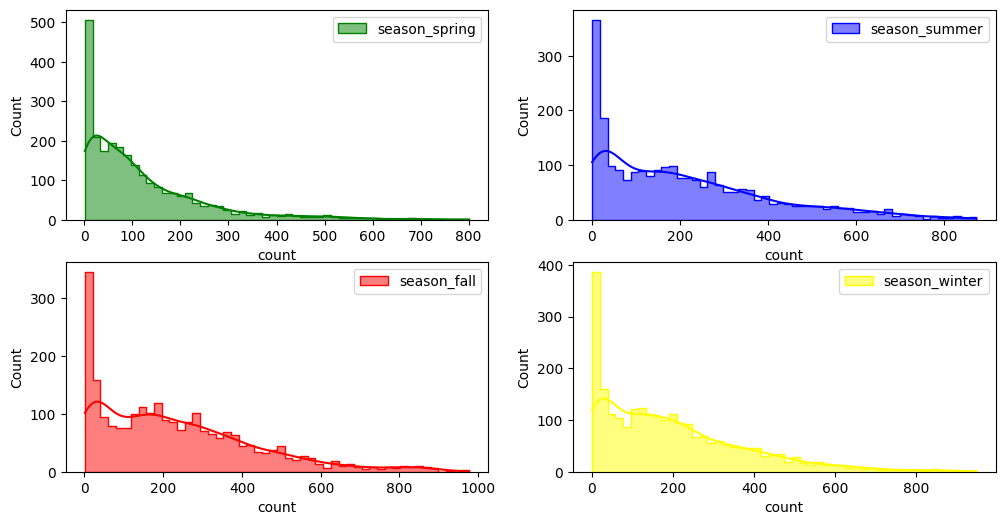

In [68]:
#Visual Tests to know if the samples follow normal distribution

plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_season_spring.sample(2500), bins = 50,
             element = 'step', color = 'green', kde = True, label = 'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(df_season_summer.sample(2500), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(df_season_fall.sample(2500), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(df_season_winter.sample(2500), bins = 50,
             element = 'step', color = 'yellow', kde = True, label = 'season_winter')
plt.legend()
plt.plot()


It can be inferred from the above plot that the distributions do not follow normal distribution.

[]

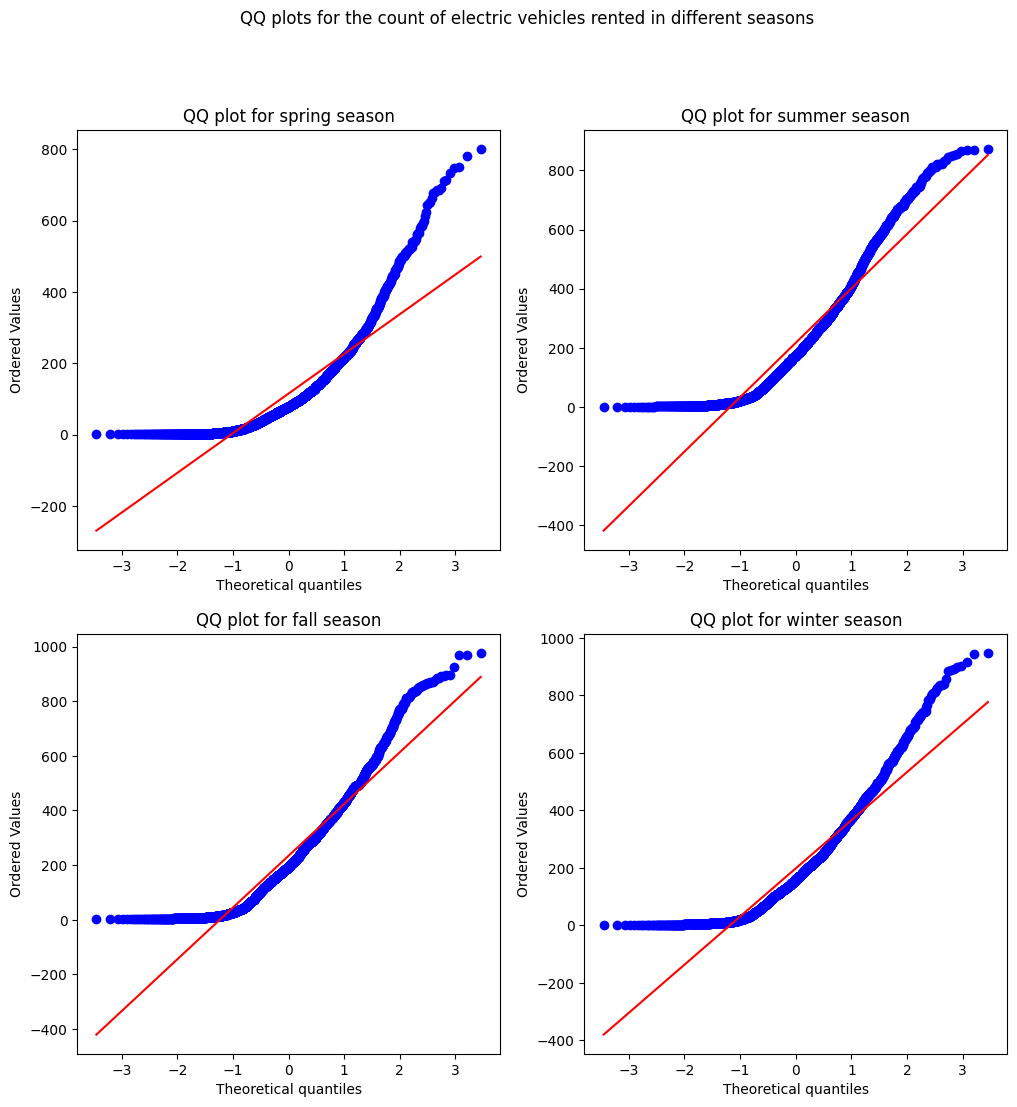

In [69]:
#Distribution check using QQ Plot

plt.figure(figsize = (12, 12))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons')
spy.probplot(df_season_spring.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for spring season')

plt.subplot(2, 2, 2)
spy.probplot(df_season_summer.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for summer season')

plt.subplot(2, 2, 3)
spy.probplot(df_season_fall.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for fall season')

plt.subplot(2, 2, 4)
spy.probplot(df_season_winter.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for winter season')
plt.plot()

It can be inferred from the above plots that the distributions do not follow normal distribution.

Applying Shapiro-Wilk test for normality
 - H0 : The sample follows normal distribution
 - H1 : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [70]:
test_stat, p_value = spy.shapiro(df_season_spring.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [71]:
test_stat, p_value = spy.shapiro(df_season_summer.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.269044086055069e-38
The sample does not follow normal distribution


In [72]:
test_stat, p_value = spy.shapiro(df_season_fall.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.551361575361988e-35
The sample does not follow normal distribution


In [73]:
test_stat, p_value = spy.shapiro(df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.173876992577018e-38
The sample does not follow normal distribution


In [74]:
t_stat,p_value= spy.kruskal(df_season_spring, df_season_summer, df_season_fall,df_season_winter)
print("f stat :",t_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: At least one season has a mean number of cycles rented that is significantly different from the others. ")
else:
 print("Fail to Reject Ho: The mean number of cycles rented is the same across different seasons ")

f stat : 699.6668548181988
p value : 2.479008372608633e-151
Reject Ho: At least one season has a mean number of cycles rented that is significantly different from the others. 


Since the p-value obtained from our test is less than the predetermined alpha level of 0.05, we have sufficient evidence to reject the null hypothesis for this test.
Indeed, this implies that we have gathered enough evidence to conclude that there is a significant difference in the mean number of cycles rented across all seasons.

**Is weather type dependent on the season**

In [75]:
data=pd.crosstab(df['weather'],df['season'])
data

season,fall,spring,summer,winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225
4,0,1,0,0


As previously mentioned, there is only one row in our dataset for weather type 4. we can ignore weather 4

In [76]:
df_removed_weather=df[~(df['weather']==4)]

In [77]:
data=pd.crosstab(df_removed_weather['weather'],df_removed_weather['season'])
data

season,fall,spring,summer,winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225


Chi-Square Test

We shall setup Null and alternate Hypotheis to check if Weather is dependent on season

H0: Weather is not dependent on the season

Ha: Weather is dependent on the season, meaning they are associated or related

We consider level of significance as 0.05

In [78]:
x_stat,p_value,dof,expected=spy.chi2_contingency(data)
print(f"x_stat:{x_stat},\np_value:{p_value},\ndof:{dof},\nexpected:{expected}")

x_stat:46.101457310732485,
p_value:2.8260014509929403e-08,
dof:6,
expected:[[1805.76352779 1774.04869086 1805.76352779 1806.42425356]
 [ 711.55920992  699.06201194  711.55920992  711.81956821]
 [ 215.67726229  211.8892972   215.67726229  215.75617823]]


In [79]:
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Weather is dependent on the season")
else:
 print("Fail to Reject Ho: Weather is not dependent on the season")

Reject Ho: Weather is dependent on the season


Since the p-value obtained from our test is less than the predetermined alpha level of 0.05, we have sufficient evidence to reject the null hypothesis for this test.

Indeed, this suggests that we have gathered enough evidence to conclude that there is a dependence between weather and the season.

**Correlation**

[]

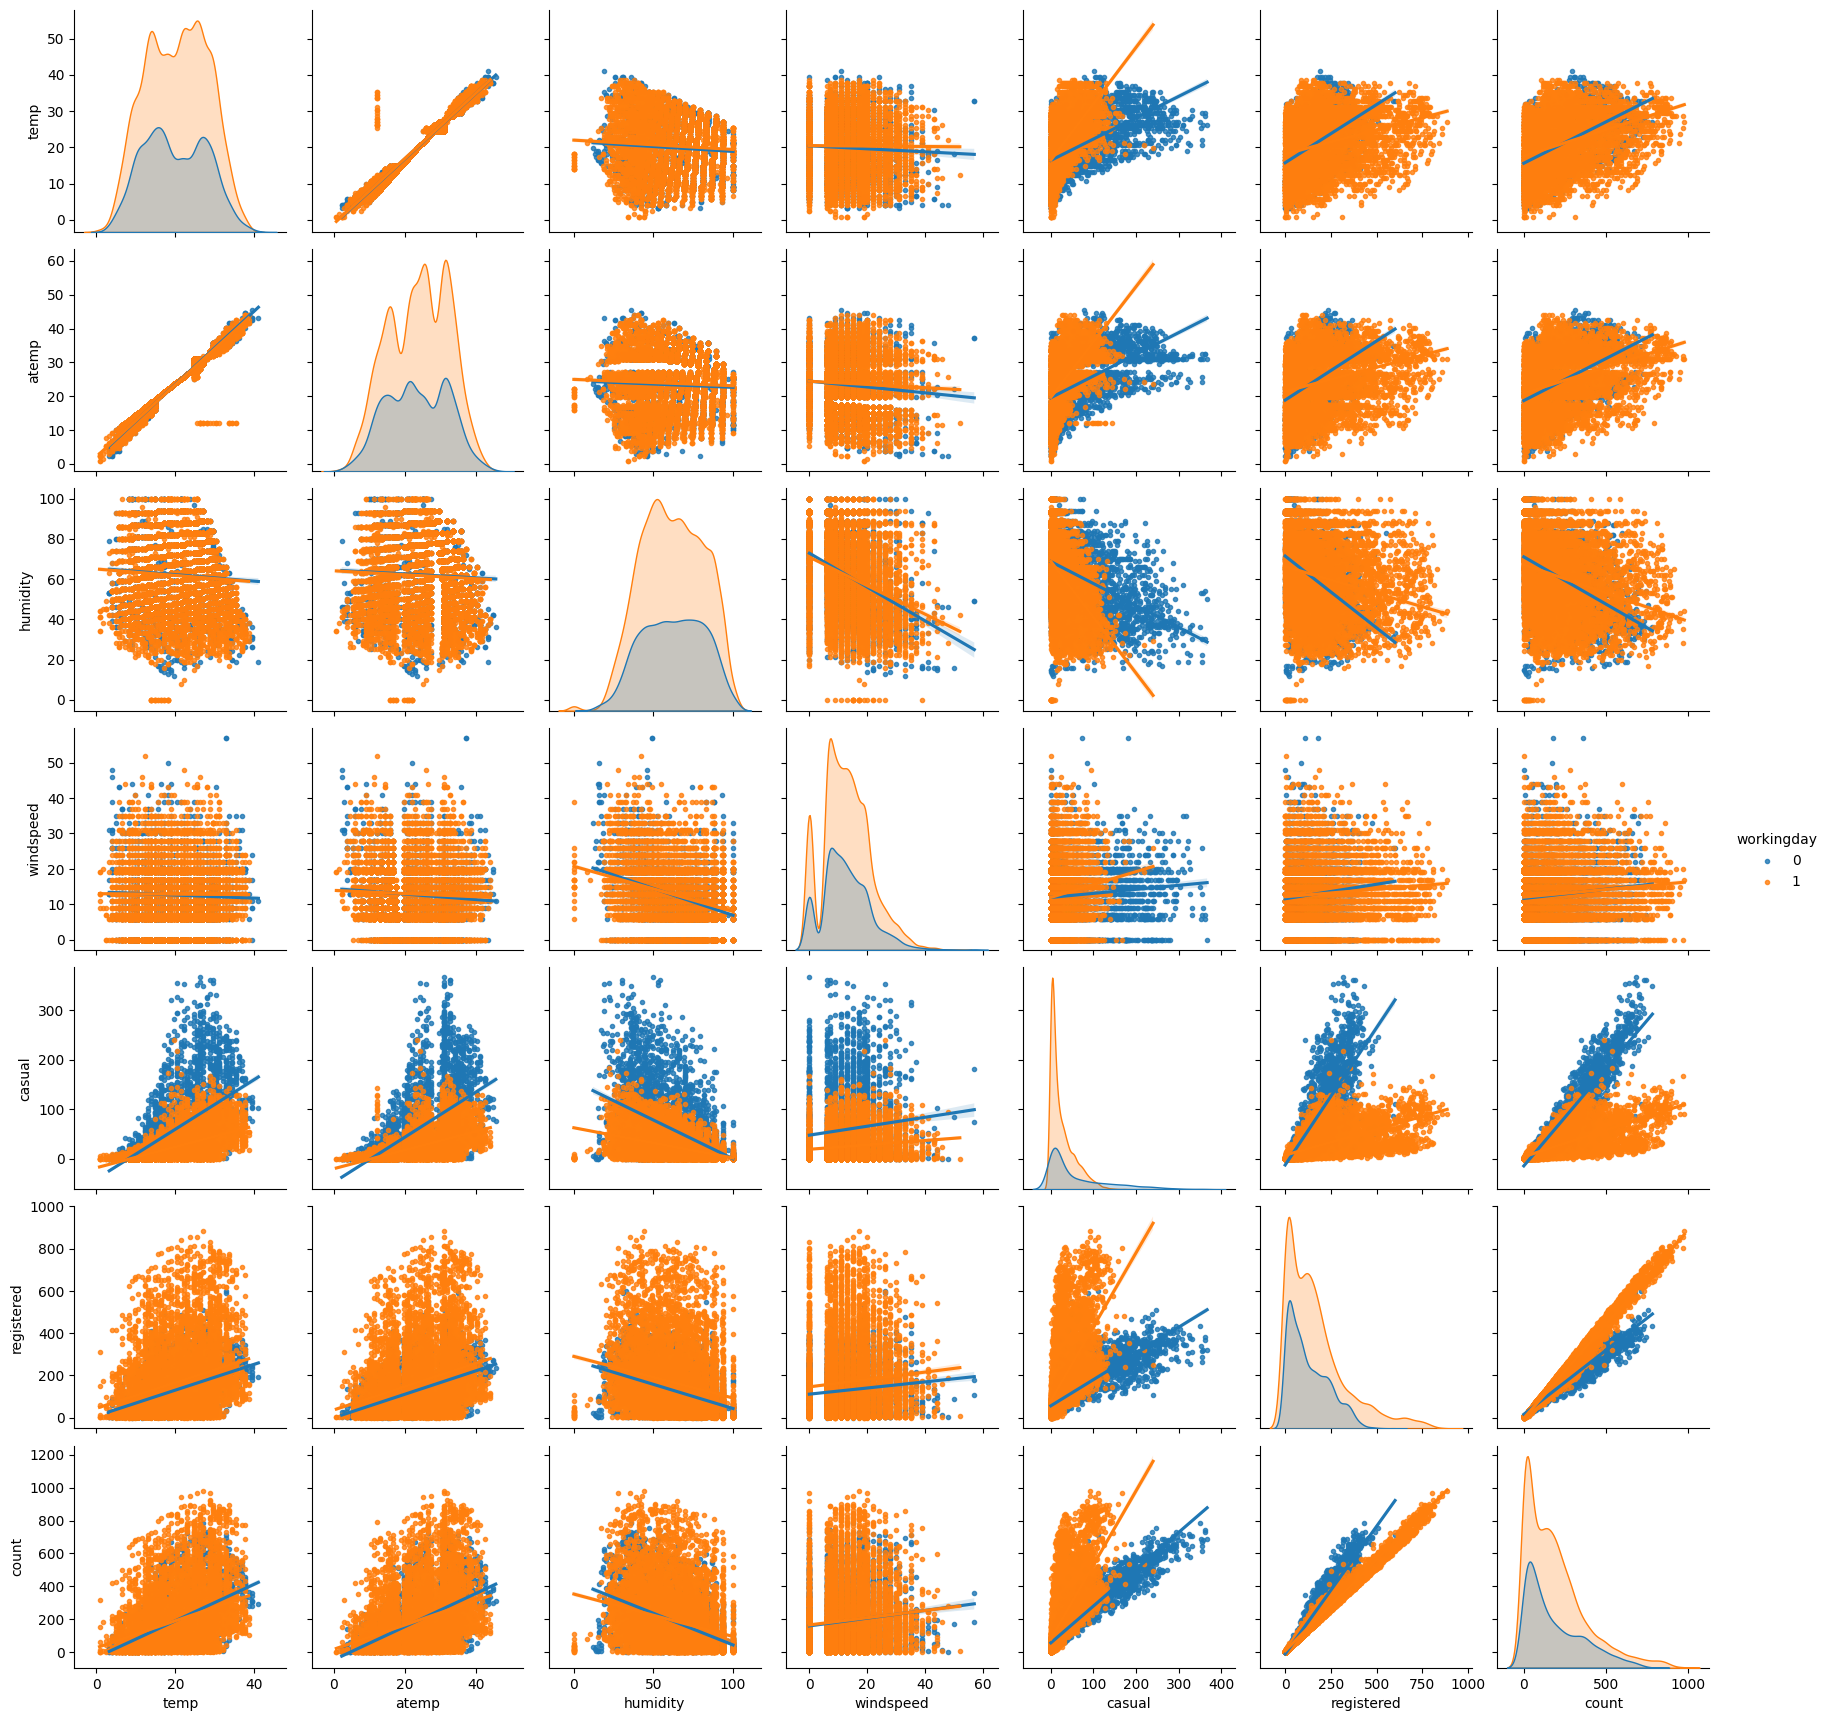

In [80]:
#plotting the pair plot

sns.pairplot(data = df,
             kind = 'reg',
             hue = 'workingday',
             markers = '.')
plt.plot()

In [81]:
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()
correlation_matrix

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


HeatMap

[]

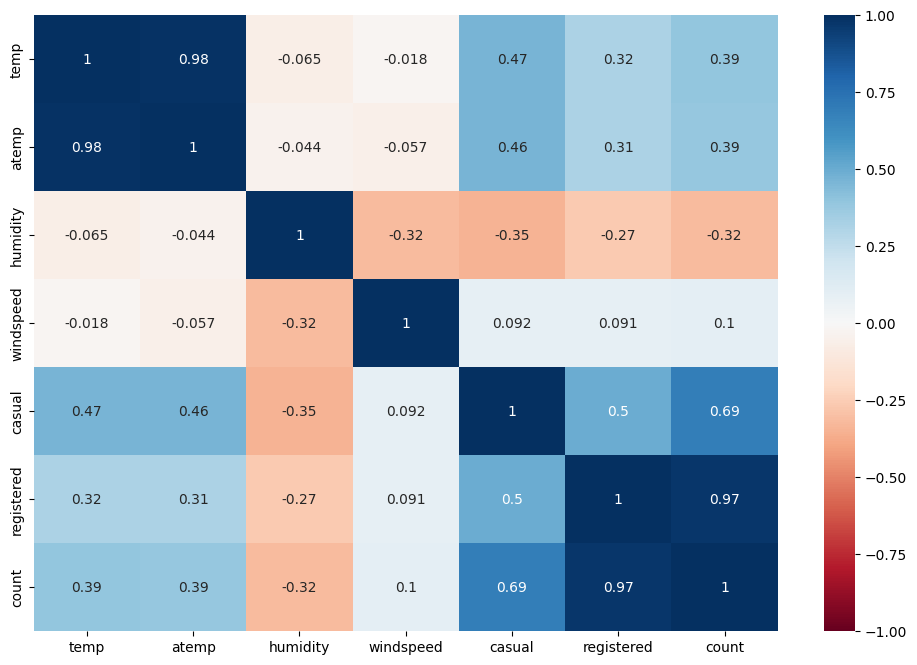

In [82]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = correlation_matrix, cmap = 'RdBu', annot = True, vmin = -1, vmax = 1)
plt.plot()

Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered]

High positively / negatively correlation (0.7 - 0.9) does not exist between any columns.

Moderate positive correlation (0.5 - 0.7) exists between columns [casual, count], [casual, registered].

Low Positive correlation (0.3 - 0.5) exists between columns [count, temp], [count, atemp], [casual, atemp]

Negligible correlation exists between all other combinations of columns.

**Insights**

 - The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.
 - Out of every 100 users, around 19 are casual users and 81 are registered users.
 - The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.
 - There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.
 - There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.
 - More than 80 % of the time, the temperature is less than 28 degrees celcius.
 - More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.
 - More than 85 % of the total, windspeed data has a value of less than 20.
 - The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.
 - The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.
 - There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.
 - The hourly total number of rental bikes is statistically different for different weathers.
 - There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.
 - The hourly total number of rental bikes is statistically different for different seasons.

**Recommendations**

 - **Seasonal Marketing**: Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

 - **Time-based Pricing**: Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

 - **Weather-based Promotions**: Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

 - **Seasonal Bike Maintenance**: Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

 - **Customer Feedback and Reviews**: Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

 - **Social Media Marketing**: Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.

 - **Special Occasion Discounts**: Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day, Earth day, World Environment Day etc in order to attract new users.
